# Decisison tree Regressor Implementation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# California house pricing dataset

from sklearn.datasets import fetch_california_housing
cal_dataset = fetch_california_housing()

In [6]:
cal_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# Creating a dataframe

In [11]:
df = pd.DataFrame(cal_dataset.data, columns = cal_dataset.feature_names)
df['target'] = cal_dataset.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Separating x and y features

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# Train-test split

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

# Implementing the Decision tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [21]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
y_pred= regressor.predict(x_test)

In [23]:
y_pred

array([0.487  , 0.521  , 5.00001, ..., 1.33   , 1.405  , 5.00001])

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

0.5947933158327877

# Hyperparameter tuning

In [30]:
parameters = {
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}

# need to pass not trained(without fit regressor model), so defining again

tree_regressor = DecisionTreeRegressor()

In [31]:
from sklearn.model_selection import GridSearchCV

regressor_cv = GridSearchCV(tree_regressor, parameters, cv = 5, scoring = 'neg_mean_squared_error')

In [32]:
regressor_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [33]:
regressor_cv.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
y_pred = regressor_cv.predict(x_test)

In [35]:
score1 = r2_score(y_pred, y_test)
score1

0.613740957113377

In [40]:
tree_regressor_best = DecisionTreeRegressor(criterion = 'poisson', max_depth = 11, max_features = 'log2', splitter = 'best')

In [41]:
tree_regressor_best.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=11, max_features='log2')

[Text(0.5091099892893145, 0.9583333333333334, 'x[7] <= -121.865\npoisson = 0.302\nsamples = 13828\nvalue = 2.067'),
 Text(0.26061224168346775, 0.875, 'x[6] <= 38.675\npoisson = 0.311\nsamples = 3264\nvalue = 2.472'),
 Text(0.3848611154863911, 0.9166666666666667, 'True  '),
 Text(0.16367266255040322, 0.7916666666666666, 'x[2] <= 6.329\npoisson = 0.246\nsamples = 2854\nvalue = 2.695'),
 Text(0.0846222908266129, 0.7083333333333334, 'x[7] <= -122.375\npoisson = 0.209\nsamples = 2244\nvalue = 2.442'),
 Text(0.04328377016129032, 0.625, 'x[6] <= 37.995\npoisson = 0.181\nsamples = 702\nvalue = 2.931'),
 Text(0.022996471774193547, 0.5416666666666666, 'x[5] <= 2.6\npoisson = 0.155\nsamples = 507\nvalue = 3.253'),
 Text(0.011214717741935484, 0.4583333333333333, 'x[0] <= 3.181\npoisson = 0.149\nsamples = 286\nvalue = 3.711'),
 Text(0.004788306451612903, 0.375, 'x[1] <= 20.0\npoisson = 0.221\nsamples = 68\nvalue = 3.265'),
 Text(0.0015120967741935483, 0.2916666666666667, 'x[1] <= 15.5\npoisson = 0.

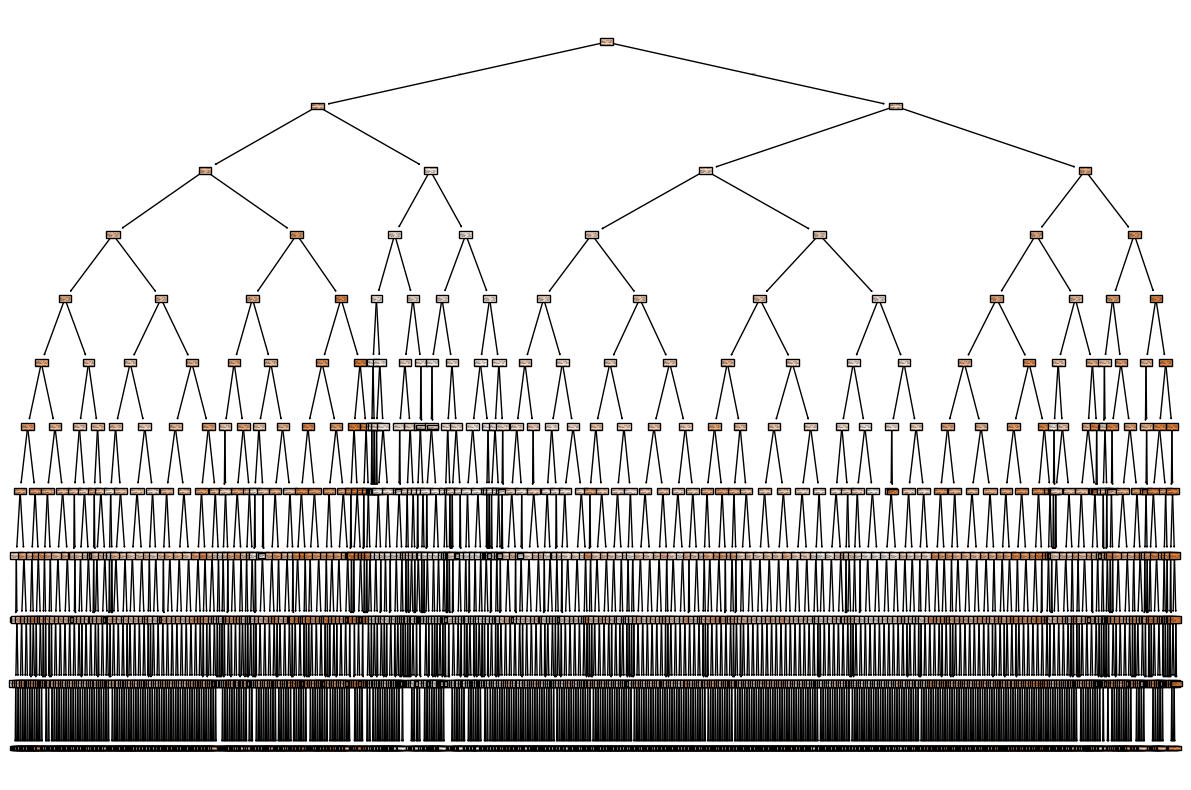

In [42]:
# Visualizing the created tree

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(tree_regressor_best, filled = True)